# Erdmagnetfeld

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

In [11]:
class Oszi:
    def __init__(self,path):
        data = np.genfromtxt(path).T
        self.time = data[0]
        self.ch1 = data[1]
        self.ch2 = data[2]

    def plot(self,xlabel=None,ylabel=None,title=None):
        fig, ax = plt.subplots(figsize=(8,5))
        ax.plot(self.time,self.ch1,label='Channel 1')
        ax.plot(self.time,self.ch2,label='Channel 2')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.legend()
        plt.title(title)

def helmholtz(N,r,I):
    '''Rückgabe der magnetischen Flussdichte'''
    return (4/5)**(3/2)*N/r*I

R = 1/0.5806117775757463
N = 80
r = 9e-2

[0.000e+00 2.000e-05 4.000e-05 ... 4.994e-02 4.996e-02 4.998e-02]
[ 0.096  0.096  0.096 ... -0.088 -0.088 -0.088]
[1.5616 1.5616 1.5616 ... 1.5544 1.5544 1.5544]


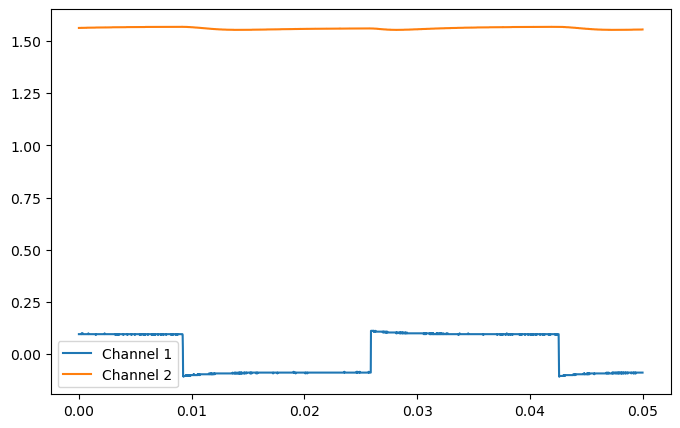

In [12]:
nordsüd = Oszi('data/ohne_B/erdmagnet/nord_sued')
nordsüd.plot()
print(nordsüd.time)
print(nordsüd.ch1)
print(nordsüd.ch2)

In [13]:
U_offset = -25.8e-3
I = U_offset/R   # Faktor 1/2, weil Strom, der in die Formel eingeht, der Strom durch eine (nicht die zwei parallelen Spulen) ist. (Aus irgendwelchen Gründen fällt der Faktor wieder weg...)
H = helmholtz(N,r,I)
B = H*const.mu_0
print(H)
print(B)

-9.527698489590332
-1.1972859038723956e-05
